# PM 2.5 Dataset Analysis with Shanghai dataset

## 1. Prepare the dataset: Preprocessing
### 1.1 Deal with missing values

In [211]:
# Shanghai dataset
# Deal with missing values
import pandas as pd

In [212]:
shanghai_pd = pd.read_csv('/Users/kiyoshi/Desktop/17Fall/FDS/FDS_project_17Fall/dataset/FiveCitiePMData/ShanghaiPM20100101_20151231.csv')

In [213]:
# Drop unecessary columns
shanghai_pd_new = shanghai_pd.drop(['No', 'PM_Jingan', 'PM_Xuhui', 'Iprec', 'cbwd' ], axis=1)
# Delete space in headers
shanghai_pd_new.rename(columns={'PM_US Post':'PM_US_Post'}, inplace=True)
shanghai_pd_new.head(5)

,year,month,day,hour,season,PM_US_Post,DEWP,HUMI,PRES,TEMP,Iws,precipitation
0,2010,1,1,0,4,NaN,-6.0,59.48,1026.1,1.0,1.0,0.0
1,2010,1,1,1,4,NaN,-6.0,59.48,1025.1,1.0,2.0,0.0
2,2010,1,1,2,4,NaN,-7.0,59.21,1025.1,0.0,4.0,0.0
3,2010,1,1,3,4,NaN,-6.0,63.94,1024.0,0.0,5.0,0.0
4,2010,1,1,4,4,NaN,-6.0,63.94,1023.0,0.0,8.0,0.0


In [214]:
# Check NA values
pd.isnull(shanghai_pd_new).sum()

year                 0
month                0
day                  0
hour                 0
season               0
PM_US_Post       18545
DEWP                13
HUMI                13
PRES                28
TEMP                13
Iws                 12
precipitation     4009
dtype: int64

In [215]:
# Drop NA values except for the target variable (PM_US Post)
shanghai_pd_new = shanghai_pd_new[pd.notnull(shanghai_pd_new['DEWP'])]
shanghai_pd_new = shanghai_pd_new[pd.notnull(shanghai_pd_new['PRES'])]
shanghai_pd_new = shanghai_pd_new[pd.notnull(shanghai_pd_new['precipitation'])]
pd.isnull(shanghai_pd_new).sum()

year                 0
month                0
day                  0
hour                 0
season               0
PM_US_Post       16669
DEWP                 0
HUMI                 0
PRES                 0
TEMP                 0
Iws                  0
precipitation        0
dtype: int64

In [216]:
"""
# Covert cbwd from category value to numerical value
shanghai_pd_new.cbwd = pd.Categorical(shanghai_pd_new.cbwd)
shanghai_pd_new['code']=shanghai_pd_new.cbwd.astype('category').cat.codes
shanghai_pd_new
"""

"\n# Covert cbwd from category value to numerical value\nshanghai_pd_new.cbwd = pd.Categorical(shanghai_pd_new.cbwd)\nshanghai_pd_new['code']=shanghai_pd_new.cbwd.astype('category').cat.codes\nshanghai_pd_new\n"

In [217]:
# Convert target (PM_US Post) into category data
# Get the description of PM2.5 
import numpy as np
pm_range = shanghai_pd_new['PM_US_Post'].max()-shanghai_pd_new['PM_US_Post'].min()

print shanghai_pd_new['PM_US_Post'].describe()
print "range: " + str(pm_range)

count    31880.000000
mean        53.411888
std         43.064480
min          1.000000
25%         26.000000
50%         42.000000
75%         67.000000
max        730.000000
Name: PM_US_Post, dtype: float64
range: 729.0


### 1.2 Add labels for the dataset

In [218]:
# Define the ranges and convert to categories
labels = [ "{0}".format(i) for i in range(1, 8) ]
shanghai_pd_new['pm_group'] = pd.cut(shanghai_pd_new.PM_US_Post, range(0, 800, 100), right=False, labels=labels)

In [219]:
# Drop unecessary columns
times = shanghai_pd_new[['year', 'month', 'day', 'hour']]
shanghai_pd_new = shanghai_pd_new.drop(['year', 'month', 'day', 'hour'], axis=1)

In [220]:
times.head(5)

,year,month,day,hour
0,2010,1,1,0
1,2010,1,1,1
2,2010,1,1,2
3,2010,1,1,3
4,2010,1,1,4


In [221]:
pd.isnull(shanghai_pd_new).sum()

season               0
PM_US_Post       16669
DEWP                 0
HUMI                 0
PRES                 0
TEMP                 0
Iws                  0
precipitation        0
pm_group         16670
dtype: int64

## 2. Correlation Analysis

In [222]:
# Take the records with missing values as test set, and others as training/validation set
test = shanghai_pd_new.loc[pd.isnull(shanghai_pd_new['PM_US_Post'])== True]
train_valid = shanghai_pd_new.loc[pd.isnull(shanghai_pd_new['PM_US_Post'])== False]

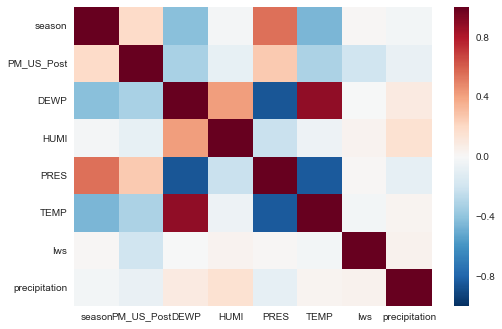

In [223]:
# Calculate correlation matrix using train_valid set
import seaborn as sns
import matplotlib.pyplot as plt

corr = train_valid.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
#print corr
plt.show()

 ### Correlation with target (PM_US Post)

        season: 0.192910
        DEWP: -0.327131
        HUMI: -0.083215
        PRES: 0.258770
        TEMP: -0.319097
        Iws: -0.199504
        precipitation: -0.071507

## 3. Split dataset and build model
### 3.1 Decision Tree

In [224]:
# Drop PS_Post
test = test.drop(['PM_US_Post'],axis=1)
train_valid_old = train_valid
train_valid = train_valid.drop(['PM_US_Post'],axis=1)

In [225]:
test.head(5)

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,pm_group
0,4,-6.0,59.48,1026.1,1.0,1.0,0.0,NaN
1,4,-6.0,59.48,1025.1,1.0,2.0,0.0,NaN
2,4,-7.0,59.21,1025.1,0.0,4.0,0.0,NaN
3,4,-6.0,63.94,1024.0,0.0,5.0,0.0,NaN
4,4,-6.0,63.94,1023.0,0.0,8.0,0.0,NaN


In [226]:
train_valid.head(5)

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,pm_group
17442,4,4.0,62.00,1027.1,11.0,8.0,0.0,1
17443,4,4.0,62.00,1027.1,11.0,9.0,0.0,1
17444,4,5.0,71.07,1028.1,10.0,11.0,0.0,1
17445,4,5.0,71.07,1028.1,10.0,13.0,0.0,1
17446,4,6.0,76.18,1028.1,10.0,15.0,0.0,1


In [227]:
# Seperate training data and valiadation set
"""
shuffled_data = train_valid.iloc[np.random.permutation(len(train_valid))]
#data = shuffled_data.reset_index(drop=True)
num_of_training = int(round(len(train_valid)*0.9))
shanghai_train = data[:num_of_training]
shanghai_train_new = shanghai_train.dropna(axis=0, how='any')
shanghai_valid = data[num_of_training:]
"""
from sklearn import model_selection

X = train_valid[['season', 'DEWP', 'HUMI', 'PRES', 'TEMP', 'Iws', 'precipitation']]
y = train_valid['pm_group']

shanghai_train_new, shanghai_valid, shanghai_y_train, shanghai_y_test = model_selection.train_test_split(X, y, test_size=0.8)

In [228]:
shanghai_train_new.head(5)
#shanghai_train_new['pm_group'].value_counts()

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation
48780,2,25.0,56.38,1006.0,35.0,3.0,0.0
44503,4,2.0,93.13,1027.0,3.0,346.0,0.1
22045,2,25.0,70.54,1003.1,31.0,17.0,0.0
43506,4,-1.0,52.98,1033.0,8.0,3.0,0.0
20034,1,11.0,72.23,1012.9,16.0,19.0,0.0


- Number of total rows: 48548
- Number of rows in training_validation set: 31879
- Number of rows in test set: 16669

In [229]:
# Feature importance(Decision Tree)
from sklearn.tree import DecisionTreeClassifier

# Build the model and fit data
tree_model = DecisionTreeClassifier(criterion="entropy")
classifier = tree_model.fit(shanghai_train_new, shanghai_y_train)

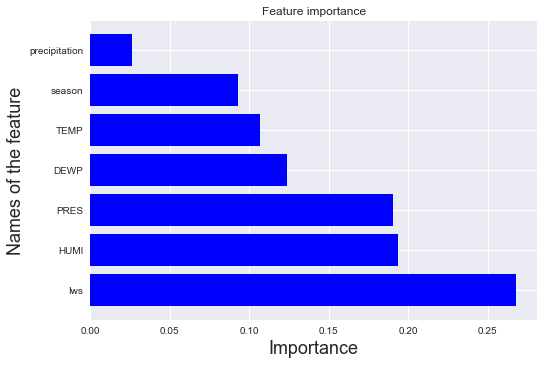

In [230]:
# Calculate importance
importance = classifier.feature_importances_
indices = np.argsort(importance)[::-1]  
name = list(shanghai_train_new)
new_name = []
for i in range(7):
    new_name.append(name[indices[i]])

# Plot image
plt.figure()
plt.title("Feature importance")
plt.barh(range(len(new_name)),importance[indices], color="b", align="center")
plt.yticks(range(shanghai_train_new.shape[1]), new_name)
plt.xlabel("Importance", fontsize = 18)
plt.ylabel("Names of the feature", fontsize = 18)
plt.show()

In [231]:
from sklearn import metrics

# Do prediction on training set
training_df = shanghai_train_new
train_accuracy = classifier.score(shanghai_train_new,  shanghai_y_train)

print "Acuracy on training set is: " + str(train_accuracy)

# Do prediction on validation set
valid_df = shanghai_valid
test_accuracy_dt = classifier.score(shanghai_valid,  shanghai_y_test)

print "Acuracy on test set is: " + str(test_accuracy_dt)


Acuracy on training set is: 0.998745294856
Acuracy on test set is: 0.823125784191


In [232]:
"""
from sklearn import metrics
import matplotlib.pylab as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

decision_tree_pre = LR_model_1.predict_proba(X_test_binary_count)[:, 1]
fpr_dt, tpr_dt, th_dt = roc_curve(Y_test, LR_tfidf_pre)
roc_auc_LR_count = auc(fpr_LR_count, tpr_LR_count)
"""

'\nfrom sklearn import metrics\nimport matplotlib.pylab as plt\nfrom sklearn.metrics import roc_auc_score, roc_curve, auc\n\ndecision_tree_pre = LR_model_1.predict_proba(X_test_binary_count)[:, 1]\nfpr_dt, tpr_dt, th_dt = roc_curve(Y_test, LR_tfidf_pre)\nroc_auc_LR_count = auc(fpr_LR_count, tpr_LR_count)\n'

### 3.2 Logistic Regression

In [233]:
# Build model and do prediction
from sklearn import linear_model
from sklearn.metrics import roc_auc_score, roc_curve, auc

LR_model = linear_model.LogisticRegression(C = 1e30)
LR_model.fit(shanghai_train_new, shanghai_y_train)
test_accuracy_lr = svm_model.score(shanghai_valid,  shanghai_y_test)

print test_accuracy_lr

0.884527917189


### 3.3 KNN

In [234]:
# Build model and do prediction
from sklearn import neighbors

num_of_neigh = [1, 3, 5, 10, 15, 50, 65, 70, 100]

for i in num_of_neigh:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=i)
    neigh.fit(shanghai_train_new, shanghai_y_train)
    score = neigh.score(shanghai_valid, shanghai_y_test)
    print "Number of neighbours: " + str(i) + " ; Test Accuracy: " + str(score)

Number of neighbours: 1 ; Test Accuracy: 0.825282308657
Number of neighbours: 3 ; Test Accuracy: 0.862139272271
Number of neighbours: 5 ; Test Accuracy: 0.873549247177
Number of neighbours: 10 ; Test Accuracy: 0.882332183187
Number of neighbours: 15 ; Test Accuracy: 0.883547678795
Number of neighbours: 50 ; Test Accuracy: 0.884527917189
Number of neighbours: 65 ; Test Accuracy: 0.884527917189
Number of neighbours: 70 ; Test Accuracy: 0.884527917189
Number of neighbours: 100 ; Test Accuracy: 0.884527917189


### 3.4 SVM

In [235]:
# Build model and do prediction
from sklearn import svm
svm_model = svm.SVC(C=0.1, kernel='linear')
svm_model.fit(shanghai_train_new, shanghai_y_train)
test_accuracy_svm = svm_model.score(shanghai_valid,  shanghai_y_test)

print test_accuracy_svm

0.884527917189


## 4. Fill missing values in test set using trained model and concat whole dataset

In [236]:
# Using KNN(K=100) as selected model
knn = neighbors.KNeighborsClassifier(n_neighbors=100)
knn.fit(shanghai_train_new, shanghai_y_train)
test['pm_group'] = knn.predict(test.drop(['pm_group'], 1))

In [237]:
# Take a look at the test set
test.head(5)

,season,DEWP,HUMI,PRES,TEMP,Iws,precipitation,pm_group
0,4,-6.0,59.48,1026.1,1.0,1.0,0.0,1
1,4,-6.0,59.48,1025.1,1.0,2.0,0.0,1
2,4,-7.0,59.21,1025.1,0.0,4.0,0.0,1
3,4,-6.0,63.94,1024.0,0.0,5.0,0.0,1
4,4,-6.0,63.94,1023.0,0.0,8.0,0.0,1


In [238]:
# Fill the values according to the pm_group
test['PM_US_Post'] = pd.Series(test['pm_group'].astype('int')*100-50)

In [239]:
# Concat the train, valid and test data
frames = [test, train_valid_old]
shanghai_data = pd.concat(frames)
shanghai_data.head(5)

,DEWP,HUMI,Iws,PM_US_Post,PRES,TEMP,pm_group,precipitation,season
0,-6.0,59.48,1.0,50.0,1026.1,1.0,1,0.0,4
1,-6.0,59.48,2.0,50.0,1025.1,1.0,1,0.0,4
2,-7.0,59.21,4.0,50.0,1025.1,0.0,1,0.0,4
3,-6.0,63.94,5.0,50.0,1024.0,0.0,1,0.0,4
4,-6.0,63.94,8.0,50.0,1023.0,0.0,1,0.0,4


In [240]:
# Concat the time information
shanghai_full_data = pd.concat([times, shanghai_data], axis = 1)

In [241]:
# There is one more NaN in pm_group inspired by the last part of section 1, dropping this 
shanghai_full_data = shanghai_full_data.dropna(axis=0, how = 'any')
shanghai_full_data.head(5)

,year,month,day,hour,DEWP,HUMI,Iws,PM_US_Post,PRES,TEMP,pm_group,precipitation,season
0,2010,1,1,0,-6.0,59.48,1.0,50.0,1026.1,1.0,1,0.0,4
1,2010,1,1,1,-6.0,59.48,2.0,50.0,1025.1,1.0,1,0.0,4
2,2010,1,1,2,-7.0,59.21,4.0,50.0,1025.1,0.0,1,0.0,4
3,2010,1,1,3,-6.0,63.94,5.0,50.0,1024.0,0.0,1,0.0,4
4,2010,1,1,4,-6.0,63.94,8.0,50.0,1023.0,0.0,1,0.0,4


In [242]:
pd.isnull(shanghai_full_data).sum()

year             0
month            0
day              0
hour             0
DEWP             0
HUMI             0
Iws              0
PM_US_Post       0
PRES             0
TEMP             0
pm_group         0
precipitation    0
season           0
dtype: int64

## 5. Time Series Analysis

### 5.1 Prepare datetime data

In [262]:
# Convert to datetime

time = shanghai_full_data[['year', 'month', 'day', 'hour']]
time = pd.to_datetime(time,format='%Y%m%d %h',infer_datetime_format=True)
shanghai_full_data['datetime'] = time

In [263]:
time_data = shanghai_full_data[['datetime', 'PM_US_Post']]
#time_data.head(5)

In [264]:
# Use datetime as index
time_data.set_index('datetime', inplace = True)
time_data.index.name = None

### 5.2 Analysis

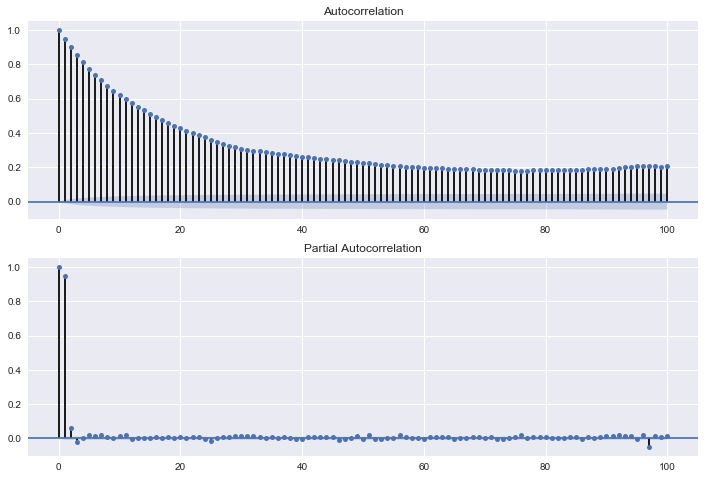

In [278]:
import statsmodels.api as sm  
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from statsmodels.graphics.api import qqplot

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(time_data.PM_US_Post, lags=100, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(time_data.PM_US_Post, lags=100, ax=ax2)
plt.show()

In [ ]:
thisIsAGoodProject[][]\\:::;
this_is_a